In [77]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as py

Our aim is to perform exploratory data analysis to check which student has performed the best from the given data from the csv file 

Our first step is to load the csv file 

In [78]:
#loading the csv file to perform exploratory data analysis
df=pd.read_csv("C:/Users/aniru/Downloads/StudentPerformance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


Understanding the data 
The first step of EDA is to understand the data that is detecting missing values or duplicates or outliers 

df.info lets us know about the datatype. If some of them are wrong we need to change the datatype during data cleaning 

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


There are no wrong datatypes . No need to convert them

Next we will use the summary statistics to conclude from the numeric data . summary statistics gives information about numeric data 

In [80]:
df.describe()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Thus we can conclude that the data is free of outliers 

let us check for any null values present in the data above 


In [81]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

We can see that there are no null values present.Thus the data is almost clean 

We check for duplicates in the data . This is known as redundancy

In [82]:
df[df.duplicated()]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48
1477,7,61,Yes,6,8,54
1601,5,99,No,7,5,89
1786,2,62,Yes,9,4,40
2026,5,87,Yes,6,7,74
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71
9940,8,95,No,5,2,90
9954,6,97,No,8,7,92
9966,1,41,No,7,3,12


As we see there are no duplicates present as well 

there is one useless column present that is "Performance Index" . We need to remove that column 

In [83]:
df.shape

(10000, 6)

The no of rows in the data is 10000 and the no of columns is 6

In [84]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

The next step is to perform data cleaning. Since there are no redundat rows present and null values. We donot need to deal with null values and duplicates that is removing them. Let us remove the useless column

In [85]:
df.drop(["Performance Index"],axis=1,inplace=True)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


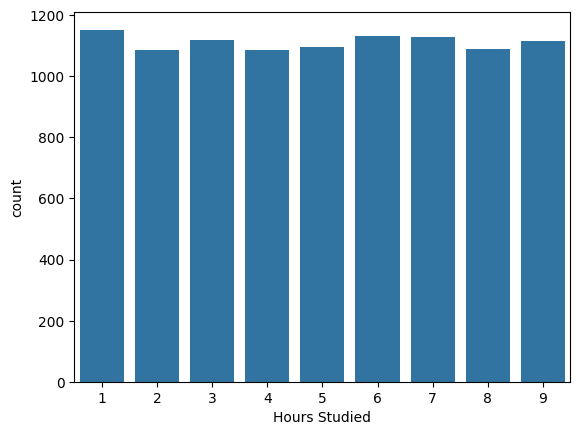

In [86]:
ax=sns.countplot(x="Hours Studied",data=df)

We see that the number of students who studied for 1 hour is the highest and then comes in second position the number of stydents who studied for 9 hours . It shows that many students are not studing that much and some students are studying hard . 

In [87]:
Marks=df.groupby(["Hours Studied"],as_index=False)["Previous Scores"].sum()
print(Marks)

   Hours Studied  Previous Scores
0              1            80227
1              2            75152
2              3            77982
3              4            75748
4              5            76277
5              6            79172
6              7            77537
7              8            76112
8              9            76250


<Axes: xlabel='Hours Studied', ylabel='Previous Scores'>

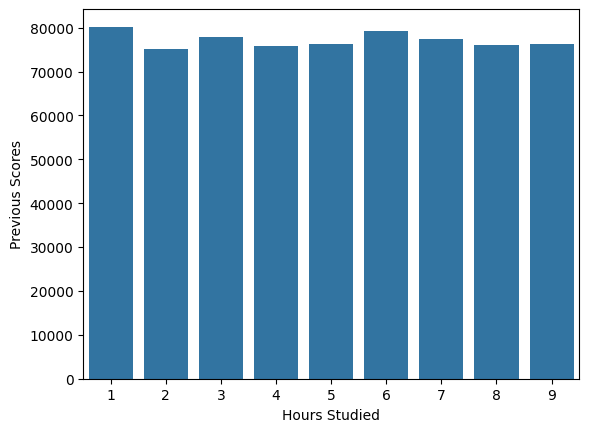

In [88]:
sns.barplot(x='Hours Studied',y='Previous Scores',data=Marks)

We see that the Total scores of the students studying for only 1 hour is higher than the ones studying for 9 hours . This shows that studying for so many hours is not helping 

In [89]:
Marks1=df.groupby(["Extracurricular Activities"],as_index=False)["Previous Scores"].sum()
Marks1

,Extracurricular Activities,Previous Scores
0,No,350114
1,Yes,344343


<Axes: xlabel='Extracurricular Activities', ylabel='Previous Scores'>

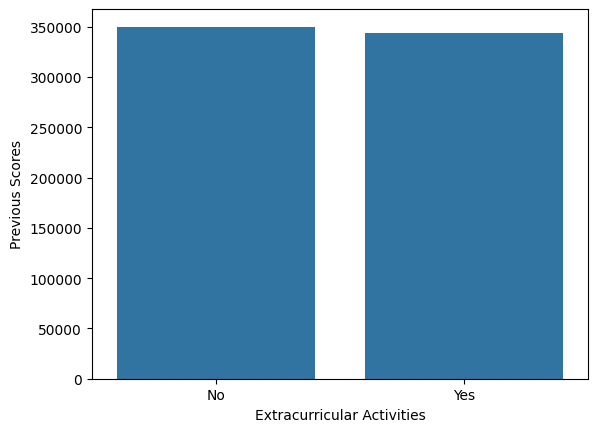

In [90]:
sns.barplot(x='Extracurricular Activities',y='Previous Scores',data=  Marks1)

We see that the total previous scores of the students who are not involved in Extracurricular activities are slightly higher than the total previous scores of the students who are involved in Extracurricular Activities. This means Extracurricular Activities are having a slight impact in reducing the scores of the students

In [91]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

In [92]:
Marks2=df.groupby(["Sample Question Papers Practiced"],as_index=False)["Previous Scores"].sum().sort_values(by='Previous Scores',ascending=False)
Marks2

,Sample Question Papers Practiced,Previous Scores
6,6,74144
9,9,73689
3,3,72220
5,5,71550
8,8,70705
7,7,68367
1,1,68123
4,4,65554
0,0,65203
2,2,64902


<Axes: xlabel='Sample Question Papers Practiced', ylabel='Previous Scores'>

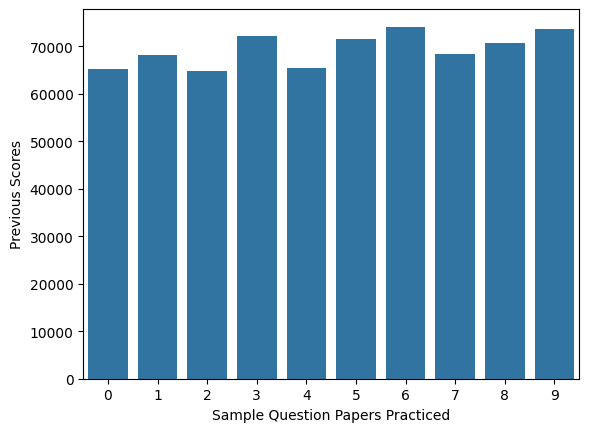

In [93]:
sns.barplot(x='Sample Question Papers Practiced',y='Previous Scores',data = Marks2)

We see that the total score of the students who practiced only 6 sample papers is higher than all and the lowest are the ones who didnot practice any at all . This shows that practicing sample question papers is having an impact on the scores and not practicing and practcing too many is not helping .So practing upto 6 sample papers is having a huge impact in increase of the marks 

In [94]:
import seaborn as sns 
Marks2=df.groupby(["Sleep Hours"],as_index=False)["Previous Scores"].sum().sort_values(by='Previous Scores',ascending=False)
Marks2

,Sleep Hours,Previous Scores
4,8,125604
3,7,116096
2,6,115777
5,9,113069
0,4,112373
1,5,111538


<Axes: xlabel='Sleep Hours', ylabel='Previous Scores'>

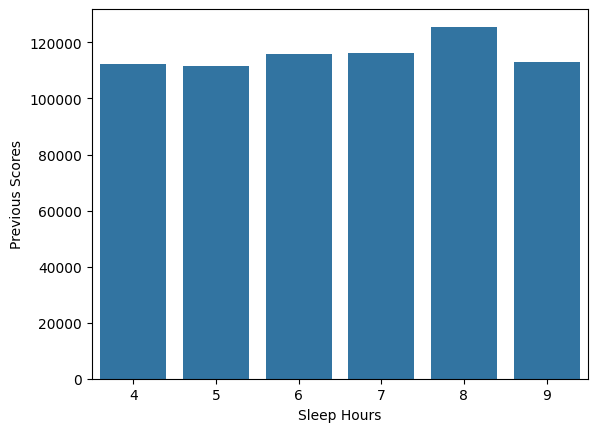

In [95]:
sns.barplot(x='Sleep Hours',y='Previous Scores',data = Marks2)

We see that the totatl score is highest for sleep hour 8. It means the students who get a good sleep of 8 hours are more likely to score well than the others 

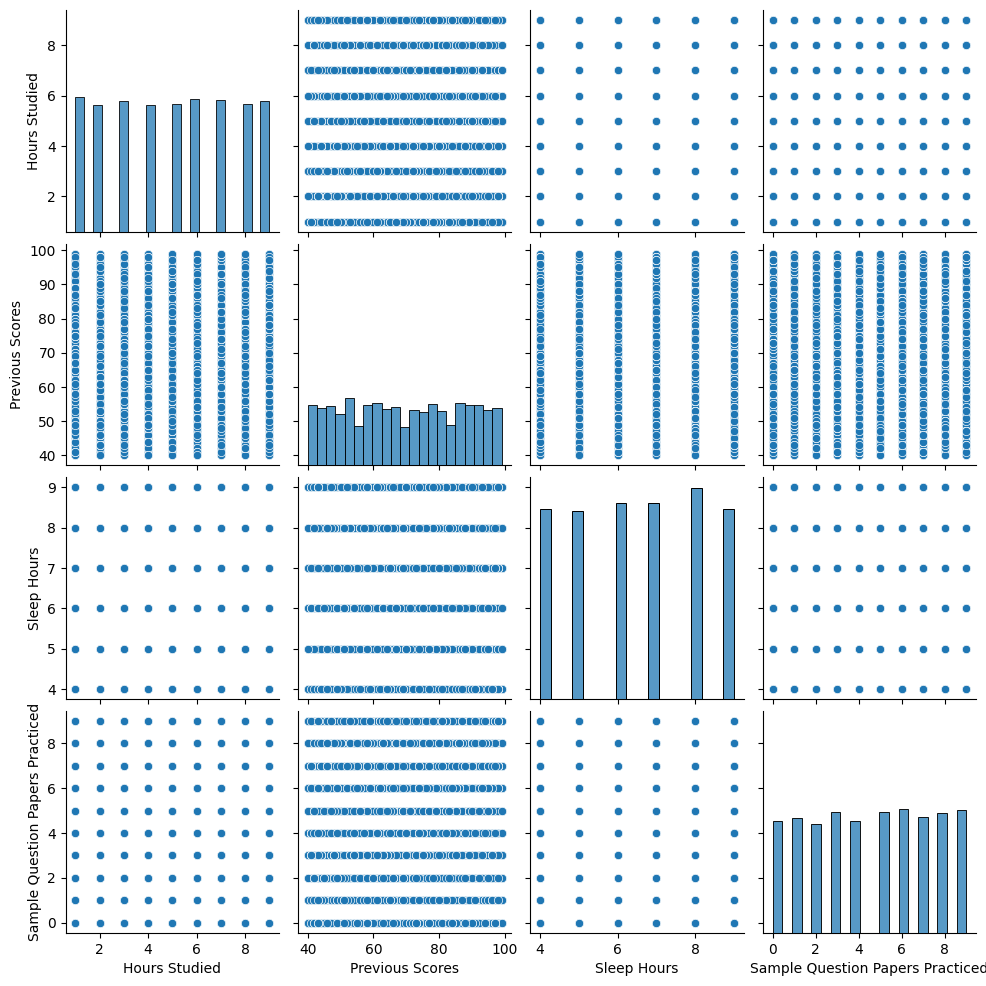

In [96]:
sns.pairplot(df)

<Axes: xlabel='Sleep Hours', ylabel='Previous Scores'>

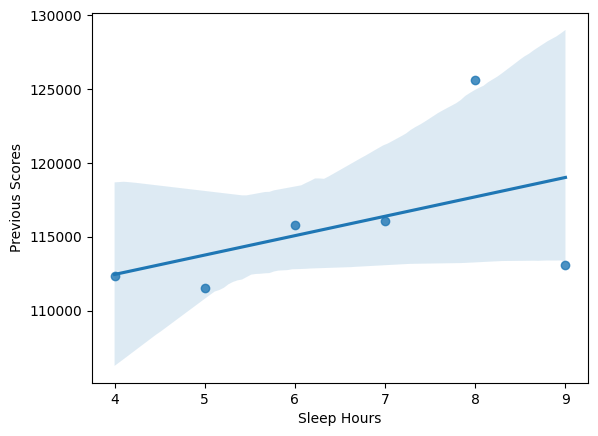

In [97]:
sns.regplot(x="Sleep Hours",y="Previous Scores",data=Marks2)

We have drawn a scatterplot to analyse how the previous score increases with the sleep hours . It shows as the sleep hour increases the scores of the students also increases sinch there exists a positive linear relationship between the two variables

Overall Conclusion: The amount of sleep has a huge impact on getting good marks . Students who have an adequate sleep of * hours tend to score well because they can study headache free . On the other hand Extracurricular activities also have an impact on the scores . Those who donot participate in any of the activities tend to score well than the others 